In [1]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

In [2]:
price1observation=900
length1observation=4

price2observation=1500
length2observation=8

In [3]:
#U2
p2=price2observation
l2=length2observation


Up = (np.exp(-0.0015*p2)-np.exp(-0.0015*3500))/(1-np.exp(-0.0015*3500))
Ul = (np.exp(-0.3)-np.exp(-0.3*l2))/(np.exp(-0.3)-np.exp(-10*0.3))
U = 0.3*Up + 0.5*Ul + 0.1*Up*Ul
U.mean(), Up,Ul.mean()

(0.5100598636348878, 0.10068002645393001, 0.9407683940376707)

In [4]:
model = pm.Model()

#For U3
with model:

    # Priors for unknown model parameters
    alpha = pm.Uniform("alpha", lower=7, upper=10)
    beta = pm.Uniform("beta", lower=1/120, upper=1/80)
    p = pm.Beta("p", alpha=2, beta=5)

    # observations
    price1 = pm.Gamma("price1",alpha=alpha,beta =beta, observed=price1observation)
    coin1 = pm.Binomial("coin1",p=p,n=9, observed=3)


    price2 = pm.Gamma("price2",alpha=alpha,beta =beta, observed=price2observation)
    coin2 = pm.Binomial("coin2",p=p,n=9, observed=length2observation-1)

    #Unknown values
    price3 = pm.Gamma("price3",alpha=alpha,beta =beta)
    length3 = 1+pm.Binomial("length3",p=p,n=9)

    Up = pm.Deterministic("Up",(pm.math.exp(-0.0015*price3)-np.exp(-0.0015*3500))/(1-np.exp(-0.0015*3500))) #(np.exp(-0.0015*p2)-np.exp(-0.0015*3500))/(1-np.exp(-0.0015*3500))
    Ul = pm.Deterministic("Ul",(pm.math.exp(-0.3)-pm.math.exp(-0.3*length3))/(pm.math.exp(-0.3)-np.exp(-10*0.3)))

    #total
    U = pm.Deterministic('U',0.3*Up + 0.5*Ul + 0.2*Up*Ul)

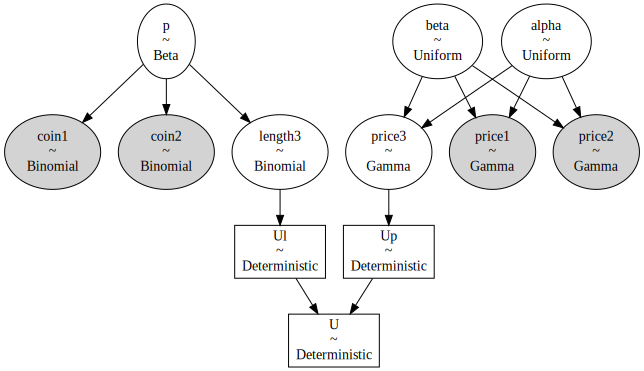

In [5]:
pm.model_to_graphviz(model)

In [6]:
with model:
    trace = pm.sample(draws= 50000,tune=1000,chains=2, random_seed=0)

Output()

Output()

In [7]:
with model:
    display(az.summary(trace))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
U,0.489,0.112,0.270,0.693,0.001,0.001,10941.0,17059.0,1.0
Ul,0.735,0.176,0.484,0.975,0.002,0.001,7962.0,12082.0,1.0
Up,0.271,0.123,0.058,0.497,0.000,0.000,78307.0,66384.0,1.0
alpha,8.933,0.772,7.511,10.000,0.003,0.002,86297.0,67814.0,1.0
beta,0.010,0.001,0.008,0.012,0.000,0.000,80321.0,62834.0,1.0
length3,4.289,1.707,1.000,7.000,0.019,0.014,7962.0,12082.0,1.0
p,0.479,0.098,0.298,0.664,0.001,0.000,23400.0,49312.0,1.0
price3,936.578,333.339,346.445,1551.735,1.164,0.823,78307.0,66384.0,1.0


In [ ]:
with model:
    az.plot_trace(trace)
    plt.tight_layout()

In [ ]:
(trace['posterior']['U']).to_numpy().mean()